#PROJECT

In [1]:
import json
import pandas as pd
import requests

# Effettua la richiesta GET all'API TfL
url = "https://api.tfl.gov.uk/AccidentStats/2019"  # Cambia l'anno a seconda dei dati che vuoi
response = requests.get(url)

# Carica la risposta in formato JSON
data = response.json()

# Converte il JSON in un DataFrame di pandas
df = pd.json_normalize(data)

# Salva il DataFrame in formato CSV
df.to_csv('incidenti_tfl_2019.csv', index=False)

/Users/aaronsalazar/LocalDocs/Bologna/ai_industry/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
df.head()

,$type,id,lat,lon,location,date,severity,borough,casualties,vehicles
0,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345979,51.570865,-0.231959,On Edgware Road Near The Junction With north C...,2019-01-04T21:22:00Z,Slight,Barnet,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
1,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345980,51.603859,-0.187240,On Willow Way Near The Junction With Long Lane,2019-01-04T23:33:00Z,Slight,Barnet,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
2,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345981,51.512198,-0.153122,On north Audley Street Near The Junction With ...,2019-01-04T22:15:00Z,Slight,City of Westminster,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
3,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345982,51.431480,-0.016083,On Bromley Road Near The Junction With Daneswo...,2019-01-04T18:00:00Z,Slight,Lewisham,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
4,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345983,51.473487,0.145202,On Belmont Road Near The Junction With Bedonwe...,2019-01-04T20:45:00Z,Slight,Bexley,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...


In [3]:
df.describe()

,id,lat,lon
count,50626.000000,50626.000000,50626.000000
mean,544054.000000,51.509198,-0.118897
std,185715.647807,0.067383,0.141133
min,345828.000000,51.295233,-0.509795
25%,358484.250000,51.468225,-0.200805
50%,544054.000000,51.514006,-0.114336
75%,729623.750000,51.553555,-0.035484
max,742280.000000,51.691126,0.307909


In [4]:
df.drop(columns=['$type'], inplace=True)

# converting 'severity' in cardinal indicator
df['severity'] = df['severity'].map({'Slight': 1, 'Serious': 2, 'Fatal': 3})
df.head()

,id,lat,lon,location,date,severity,borough,casualties,vehicles
0,345979,51.570865,-0.231959,On Edgware Road Near The Junction With north C...,2019-01-04T21:22:00Z,1,Barnet,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
1,345980,51.603859,-0.187240,On Willow Way Near The Junction With Long Lane,2019-01-04T23:33:00Z,1,Barnet,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
2,345981,51.512198,-0.153122,On north Audley Street Near The Junction With ...,2019-01-04T22:15:00Z,1,City of Westminster,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
3,345982,51.431480,-0.016083,On Bromley Road Near The Junction With Daneswo...,2019-01-04T18:00:00Z,1,Lewisham,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
4,345983,51.473487,0.145202,On Belmont Road Near The Junction With Bedonwe...,2019-01-04T20:45:00Z,1,Bexley,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...


In [5]:
borough_encoded = pd.get_dummies(df['borough'], prefix='borough', dtype=int)
df = pd.concat([df, borough_encoded], axis=1)
df.drop('borough', axis=1, inplace=True)

df.head()

,id,lat,lon,location,date,severity,casualties,vehicles,borough_Barking and Dagenham,borough_Barnet,...,borough_Lewisham,borough_Merton,borough_Newham,borough_Redbridge,borough_Richmond upon Thames,borough_Southwark,borough_Sutton,borough_Tower Hamlets,borough_Waltham Forest,borough_Wandsworth
0,345979,51.570865,-0.231959,On Edgware Road Near The Junction With north C...,2019-01-04T21:22:00Z,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,1,...,0,0,0,0,0,0,0,0,0,0
1,345980,51.603859,-0.187240,On Willow Way Near The Junction With Long Lane,2019-01-04T23:33:00Z,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,1,...,0,0,0,0,0,0,0,0,0,0
2,345981,51.512198,-0.153122,On north Audley Street Near The Junction With ...,2019-01-04T22:15:00Z,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,0,...,0,0,0,0,0,0,0,0,0,0
3,345982,51.431480,-0.016083,On Bromley Road Near The Junction With Daneswo...,2019-01-04T18:00:00Z,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,0,...,1,0,0,0,0,0,0,0,0,0
4,345983,51.473487,0.145202,On Belmont Road Near The Junction With Bedonwe...,2019-01-04T20:45:00Z,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.drop('location', axis=1, inplace=True)

In [7]:
df.head()

,id,lat,lon,date,severity,casualties,vehicles,borough_Barking and Dagenham,borough_Barnet,borough_Bexley,...,borough_Lewisham,borough_Merton,borough_Newham,borough_Redbridge,borough_Richmond upon Thames,borough_Southwark,borough_Sutton,borough_Tower Hamlets,borough_Waltham Forest,borough_Wandsworth
0,345979,51.570865,-0.231959,2019-01-04T21:22:00Z,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,345980,51.603859,-0.187240,2019-01-04T23:33:00Z,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,345981,51.512198,-0.153122,2019-01-04T22:15:00Z,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,345982,51.431480,-0.016083,2019-01-04T18:00:00Z,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,345983,51.473487,0.145202,2019-01-04T20:45:00Z,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,id,lat,lon,date,severity,casualties,vehicles,borough_Barking and Dagenham,borough_Barnet,borough_Bexley,...,borough_Lewisham,borough_Merton,borough_Newham,borough_Redbridge,borough_Richmond upon Thames,borough_Southwark,borough_Sutton,borough_Tower Hamlets,borough_Waltham Forest,borough_Wandsworth
0,345979,51.570865,-0.231959,2019-01-04 21:22:00+00:00,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,345980,51.603859,-0.187240,2019-01-04 23:33:00+00:00,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,345981,51.512198,-0.153122,2019-01-04 22:15:00+00:00,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,345982,51.431480,-0.016083,2019-01-04 18:00:00+00:00,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,345983,51.473487,0.145202,2019-01-04 20:45:00+00:00,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,0,1,...,0,0,0,0,0,0,0,0,0,0


<Axes: ylabel='Frequency'>

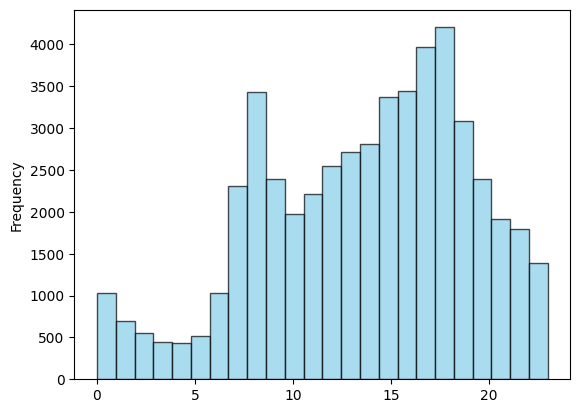

In [9]:
df['date'].dt.hour.plot.hist(bins=24, color='skyblue', edgecolor='black', alpha=0.7)

In [10]:
df['time_of_day'], bins = pd.qcut(df['date'].dt.hour, q=6, labels=['Early Morning', 'Morning', 'Midday', 'Afternoon', 'Evening', 'Night'], retbins=True)
print(bins)
df_tod = df.loc[['id', 'time_of_day']]

[ 0.  8. 11. 15. 17. 19. 23.]


KeyError: "None of [Index(['id', 'time_of_day'], dtype='object')] are in the [index]"

In [19]:
df.head()


,id,lat,lon,date,severity,casualties,vehicles,borough_Barking and Dagenham,borough_Barnet,borough_Bexley,...,borough_Merton,borough_Newham,borough_Redbridge,borough_Richmond upon Thames,borough_Southwark,borough_Sutton,borough_Tower Hamlets,borough_Waltham Forest,borough_Wandsworth,time_of_day
0,345979,51.570865,-0.231959,2019-01-04 21:22:00+00:00,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,1,0,...,0,0,0,0,0,0,0,0,0,Night
1,345980,51.603859,-0.187240,2019-01-04 23:33:00+00:00,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,1,0,...,0,0,0,0,0,0,0,0,0,Night
2,345981,51.512198,-0.153122,2019-01-04 22:15:00+00:00,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,0,0,...,0,0,0,0,0,0,0,0,0,Night
3,345982,51.431480,-0.016083,2019-01-04 18:00:00+00:00,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,0,0,...,0,0,0,0,0,0,0,0,0,Evening
4,345983,51.473487,0.145202,2019-01-04 20:45:00+00:00,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,0,1,...,0,0,0,0,0,0,0,0,0,Night


In [25]:
df_tod = df.get(['id','time_of_day'])
df_tod.to_csv('tod_analysis.csv', index=False)

# NOTES SECTION

## 3 OPTIONS:

* Forcasting
 * Determine out of the dataset what would happen
 * Predict accidents most likely
 * we could use past year data and compare directly with more recent data

* Corelating variables
 * Finding relationship betweetn different variables
 * expanding knowledge base to variables such as
 * Street direction, speed limit, street light, roundabout presence
 * tackle problems that normal statistics patterns or resarch can struggle with
 * Anomaly detection


* Optimization
 * Optimize the dataset
 * Most likely determining the best way to have the London transportation system
 * A simulation, hard to determine results




We could study what subjects are more at risk of severe accidents

What parts of the city are the most at risk

For insurance purposes


IDEA:
We could study the correlation between variables and accidents -> building a cost function to determine the reliability of a certain subject
Could be useful for INSURANCE COMPANIES

hi